<a href="https://colab.research.google.com/github/YEUNSU/jiho-english-quiz/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
!pip install opencv-python matplotlib

### 기본 이미지 출력

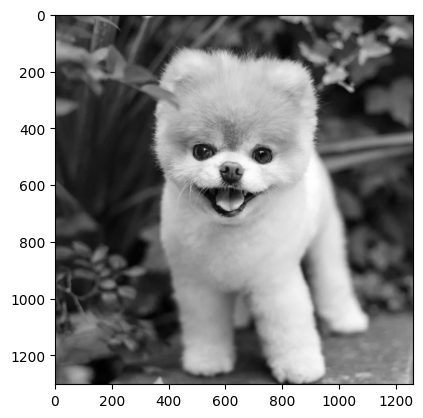

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. 이미지 로딩
img = cv2.imread("dog.png")  # BGR 포맷

# 2. 색상 공간 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img_gray, cmap = 'gray')
plt.show()


### subplot test

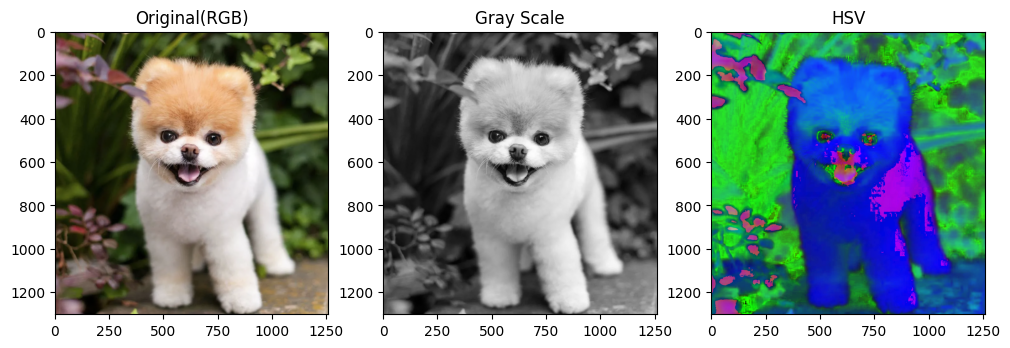

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 로딩
img = cv2.imread("/content/dog.png")  # BGR 포맷

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original(RGB)')
plt.imshow(img_rgb)

plt.subplot(1, 3, 2)
plt.title('Gray Scale')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('HSV')
plt.imshow(img_hsv)

plt.show()


무조건 컴퓨터 비전에서는 앞이 행 뒤가 열
세로*가로 이다.

(1302, 1260, 3)
세로 / 가로 / 채널(RGB)

그림은 기본적으로 3차원이다.
4차원을 쓰는 의미는?
(100, 1302, 1260, 3) => 100은 그림의 장수
그림은 기본적으로 4차원이다.
형상을 이해하는게 중요하다.

OPENCV가 여는건 그림인데 HIGHT WIDTH CHANEL이다.

print(type(img)) ctrl+/
print(img.shape)
shift+enter : 실행하고 아래로 내려가고, ctrl+enter : 실행하고 그대로
단축키는 도구에서 보자!


### sobel test (1차미분)

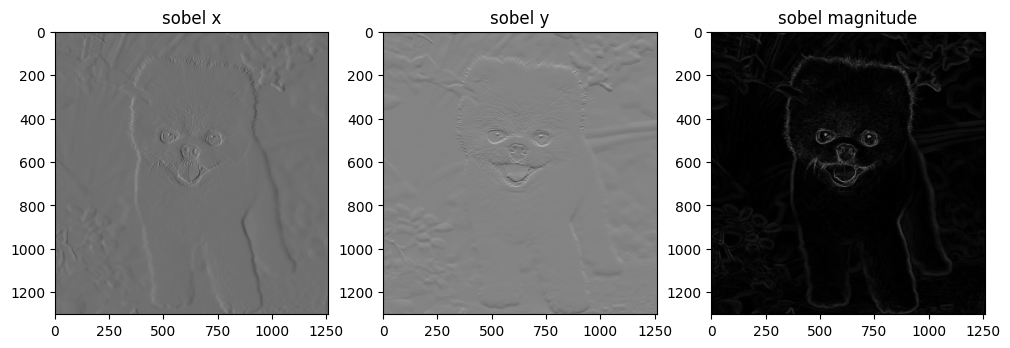

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 로딩
img = cv2.imread("/content/dog.png")

# 2. 그레이 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Sobel 엣지 검출
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely) #절대값
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) #절대값변환및정규화

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('sobel x')
plt.imshow(sobelx, cmap ='gray')

plt.subplot(1, 3, 2)
plt.title('sobel y')
plt.imshow(sobely, cmap = 'gray')

# plt.subplot(1, 3, 3)
# plt.title('sobel combined')
# plt.imshow(sobel_combined, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title('sobel magnitude')
plt.imshow(sobel_combined, cmap = 'gray')

plt.show()

### Canny Edge test

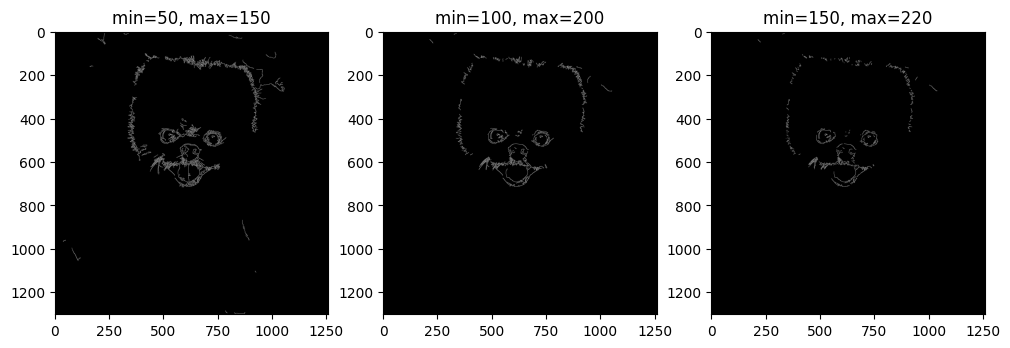

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 로딩
img = cv2.imread("/content/dog.png")

# 평균블러적용(5x5 커널)
avg_blur = cv2.blur(img, (5, 5))
# 가우시안블러적용(5x5 커널, 표준편차0)
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
# 미디언블러적용(5x5 커널)
median_blur = cv2.medianBlur(img, 5)


plt.show()

#### laplacian test (2차미분)

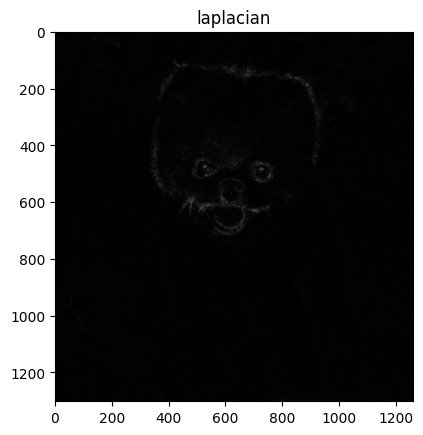

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 로딩
img = cv2.imread("/content/dog.png")

# 2. 그레이 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. lapacian 엣지 검출
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# 절대값변환및정규화
laplacian = cv2.normalize(np.abs(laplacian), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.title('laplacian')
plt.imshow(laplacian, cmap = 'gray')

plt.show()

#### blur test

(1302, 1260, 3)
(1302, 1260, 3)


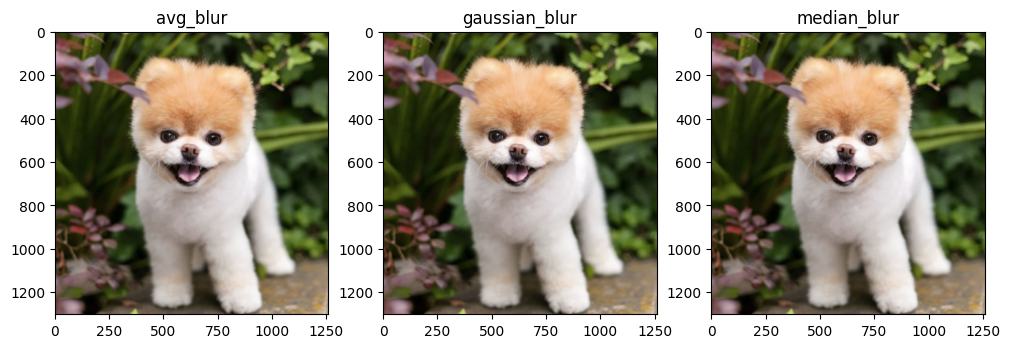

In [ ]:
import cv2
import matplotlib.pyplot as plt # Added matplotlib import

img = cv2.imread('dog.png') # Corrected filename to dog.png
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

# 평균블러적용(5x5 커널)
avg_blur = cv2.blur(img, (5, 5))
# 가우시안블러적용(5x5 커널, 표준편차0)
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
# 미디언블러적용(5x5 커널)
median_blur = cv2.medianBlur(img, 5)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('avg_blur')
plt.imshow(avg_blur)
print(avg_blur.shape)

plt.subplot(1, 3, 2)
plt.title('gaussian_blur')
plt.imshow(gaussian_blur)

plt.subplot(1, 3, 3)
plt.title('median_blur')
plt.imshow(median_blur)

plt.show() # Added plt.show() to display the plot

### sharpening histogram test

(1302, 1260, 3)


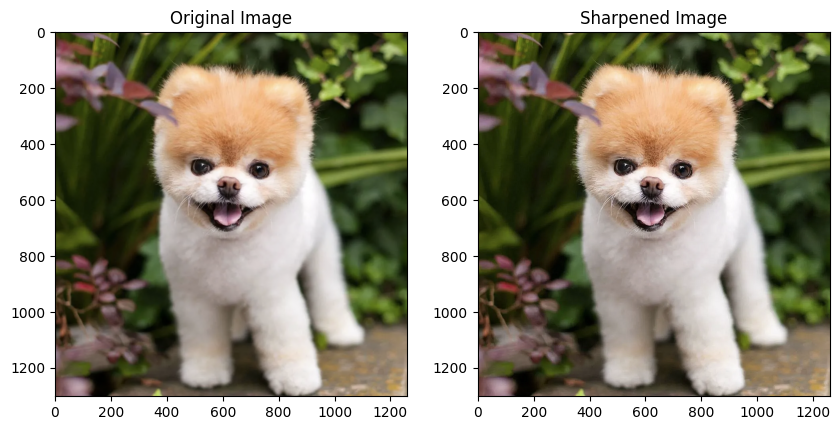

In [ ]:
import cv2
import matplotlib.pyplot as plt # Added matplotlib import
import numpy as np

img = cv2.imread('dog.png') # Corrected filename to dog.png
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])

# Apply the sharpening filter
sharpened_img = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_img)

plt.show() # Added plt.show() to display the plot

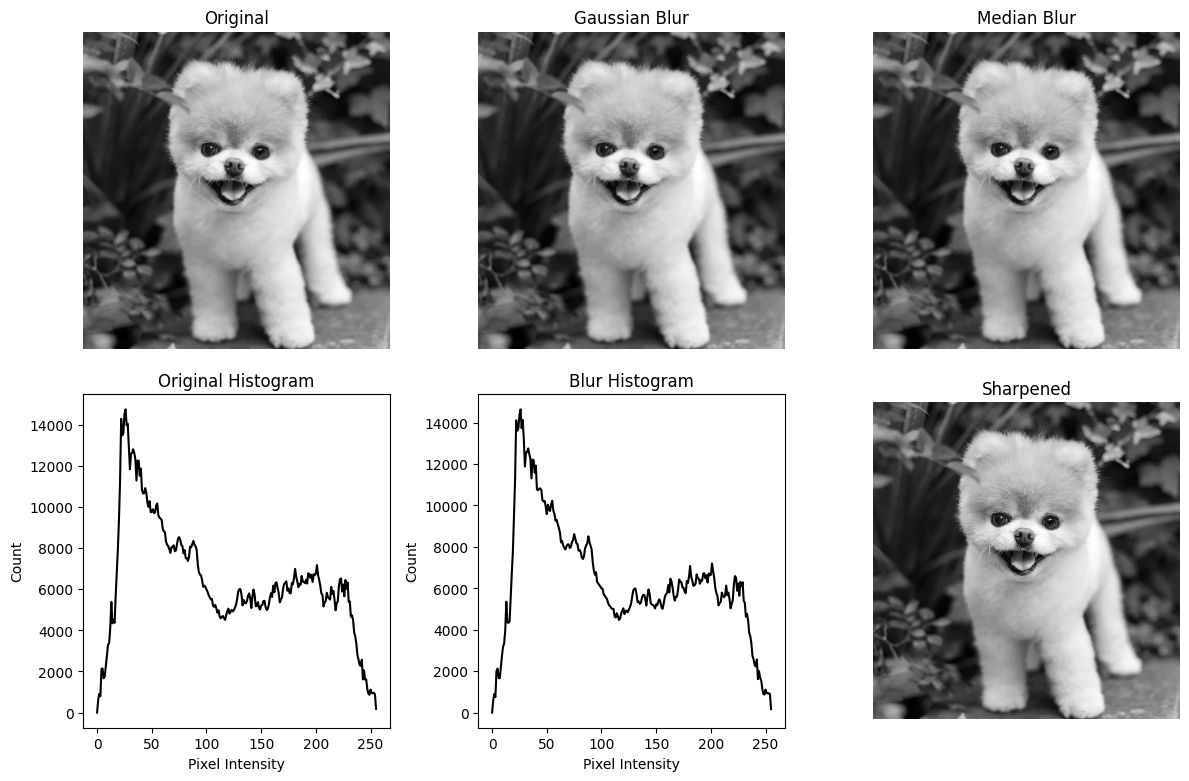

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로딩
img = cv2.imread("/content/dog.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. 필터 적용
blur = cv2.GaussianBlur(gray, (5, 5), 0)
median = cv2.medianBlur(gray, 5)

# 샤프닝 필터 커널
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpen = cv2.filter2D(gray, -1, kernel)

# 2. 히스토그램 계산 함수
def plot_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')

# 3. 결과 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1), plt.imshow(gray, cmap='gray'), plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2), plt.imshow(blur, cmap='gray'), plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 3), plt.imshow(median, cmap='gray'), plt.title("Median Blur")
plt.axis('off')

plt.subplot(2, 3, 4), plot_histogram(gray, "Original Histogram")
plt.subplot(2, 3, 5), plot_histogram(blur, "Blur Histogram")
plt.subplot(2, 3, 6), plt.imshow(sharpen, cmap='gray'), plt.title("Sharpened")
plt.axis('off')

plt.tight_layout()
plt.show()


(1302, 1260)
(128, 128, 3)
(1302, 1260, 3)


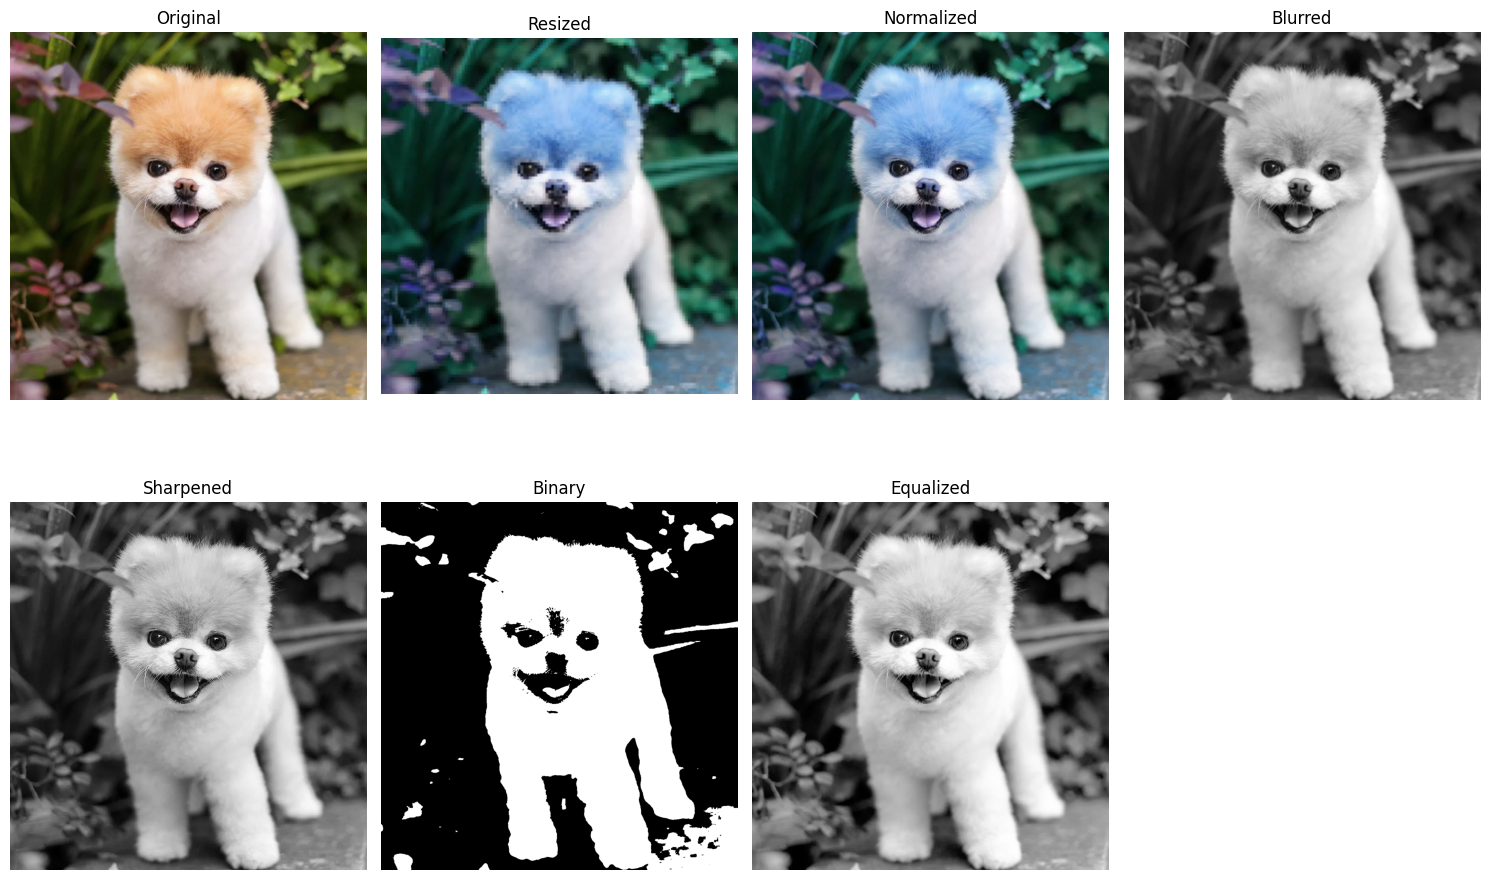

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 원본 이미지 불러오기
img = cv2.imread("/content/dog.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(gray.shape)

# 1. 크기 조정
resized = cv2.resize(img, (128, 128))
print(resized.shape)

#print(resized{10:10}) # Removed this line

# 2. 정규화
normalized = img / 255.0
print(normalized.shape)

# 3. 블러 처리
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 4. 샤프닝
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(gray, -1, kernel)

# 5. 이진화
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 6. 히스토그램 평활화
equalized = cv2.equalizeHist(gray)

# 시각화
titles = ["Original", "Resized", "Normalized", "Blurred", "Sharpened", "Binary", "Equalized"]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), resized, normalized, blurred, sharpened, binary, equalized]

plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(2, 4, i+1)
    if i == 2:
        plt.imshow(images[i])  # normalized RGB
    else:
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from typing import Literal
import cv2
import numpy as np
import matplotlib.pyplot as plt

origin = np.array([[0,0,0,0,0],
                   [0,1,1,1,0],
                   [0,1,1,1,0],
                   [0,1,1,1,0],
                   [0,0,0,0,0]], dtype=np.uint8) * 255

kernel = np.array([[1,1],
                   [1,1]], dtype=np.uint8)

#침식 : 지우는효과
eroded = cv2.erode(origin, kernel, iterations=1)
print(origin)
print(eroded/255)

#팽창 : 메워주는효과
dilated = cv2.dilate(origin, kernel, iterations=1)
print(origin)
print(dilated/255)

[[  0   0   0   0   0]
 [  0 255 255 255   0]
 [  0 255 255 255   0]
 [  0 255 255 255   0]
 [  0   0   0   0   0]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[  0   0   0   0   0]
 [  0 255 255 255   0]
 [  0 255 255 255   0]
 [  0 255 255 255   0]
 [  0   0   0   0   0]]
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]]


### 침식은 하나만 0이어도 0, 하나라도 1이 있으면 1

In [ ]:
!wget https://raw.githubusercontent.com/imguru-mooc/opencv_vision/main/data/green_screen_sample.png

--2025-08-25 04:56:10--  https://raw.githubusercontent.com/imguru-mooc/opencv_vision/main/data/green_screen_sample.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108054 (106K) [image/png]
Saving to: ‘green_screen_sample.png.2’

green_screen_sample 100%[===================>] 105.52K  --.-KB/s    in 0.003s  

2025-08-25 04:56:10 (40.3 MB/s) - ‘green_screen_sample.png.2’ saved [108054/108054]



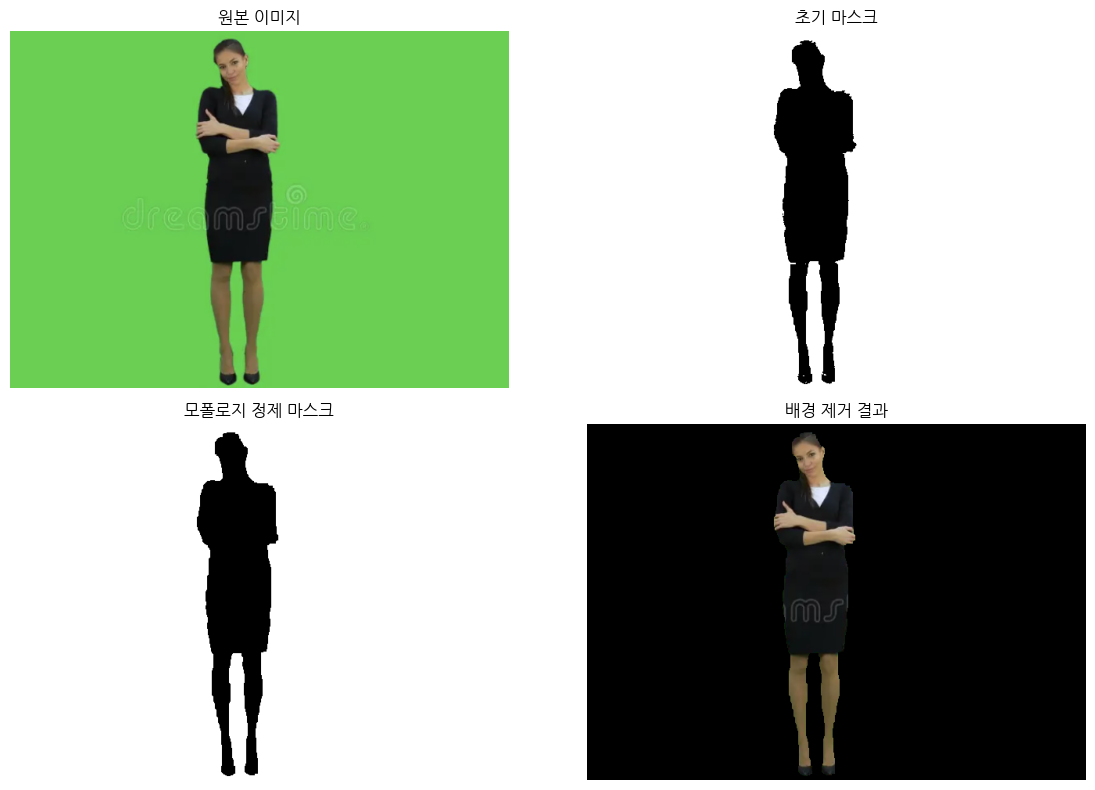

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 1. 이미지 로딩 및 색상 변환
img = cv2.imread("/content/green_screen_sample.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2. 초록 배경 마스크 범위 정의 (예시: 녹색 계열)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

# 3. 모폴로지 연산 (노이즈 제거 및 객체 개선)
kernel = np.ones((5, 5), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 4. 마스크 적용 → 배경 제거
result = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask_clean))

# 5. 시각화
titles = ["원본 이미지", "초기 마스크", "모폴로지 정제 마스크", "배경 제거 결과"]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), mask, mask_clean, cv2.cvtColor(result, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 1 or i == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00


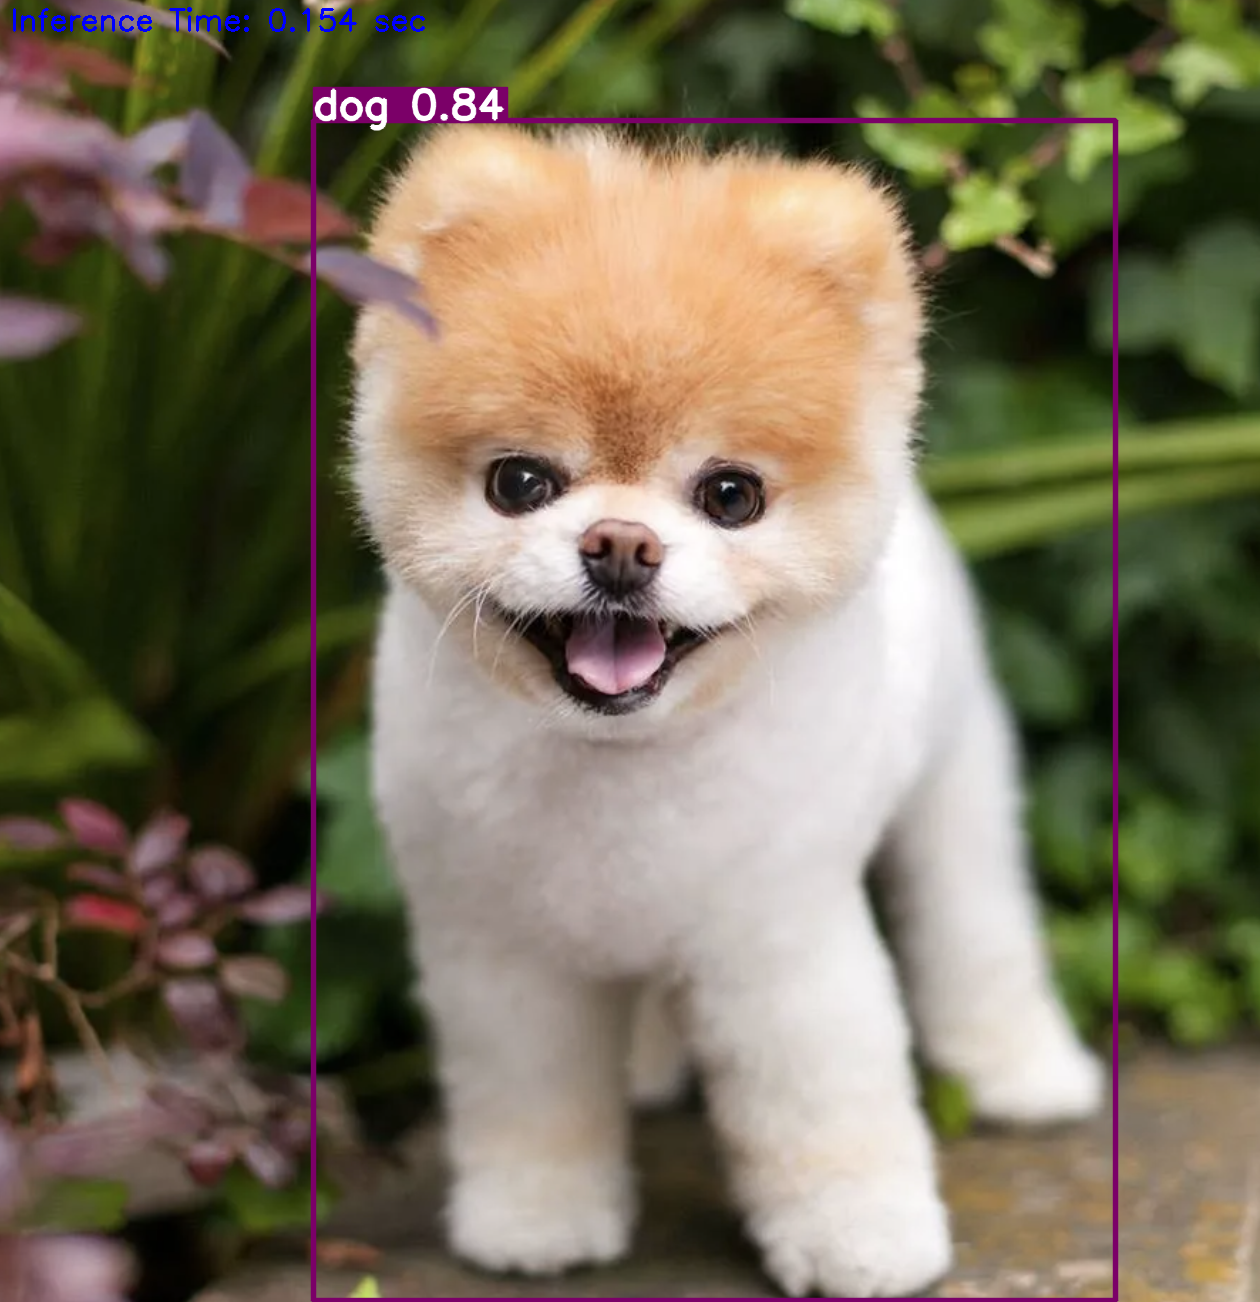

In [ ]:


from ultralytics import YOLO
import cv2
import time
from google.colab.patches import cv2_imshow  # ✅ Colab 전용 이미지 출력 함수

# 1. YOLO 모델 로딩
model = YOLO("yolov8n.pt")

# 2. 이미지 로딩
image_path = "/content/dog.png"  # ← 이미지 경로 설정
image = cv2.imread(image_path)

# 3. YOLO 추론 (CPU 기반)
start = time.time()
results = model.predict(
    source=image,
    imgsz=320,
    conf=0.4,
    iou=0.5,
    device='cpu',     # ✅ Colab은 GPU 미사용 시 CPU 설정
    verbose=False
)
end = time.time()
elapsed = end - start

# 4. 결과 시각화
annotated_image = results[0].plot()
fps_text = f"Inference Time: {elapsed:.3f} sec"
cv2.putText(annotated_image, fps_text, (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# 5. 이미지 출력 (Colab에서는 cv2_imshow 사용)
cv2_imshow(annotated_image)

In [ ]:

# ✅ 필수 라이브러리 설치
!pip install ultralytics --upgrade